# Simple diffusion example

This script provides our simplest example of Oceananigans.jl functionality:
the diffusion of a one-dimensional Gaussian. This example demonstrates

  * how to load `Oceananigans.jl`;
  * how to instantiate an `Oceananigans.jl` `Model`;
  * how to set an initial condition with a function;
  * how to time-step a model forward, and finally
  * how to look at results.

## Using `Oceananigans.jl`

To use `Oceananigans.jl` after it has been installed, we bring
`Oceananigans.jl` functions and names into our 'namespace' by writing

In [15]:
using Oceananigans

We also use `PyPlot.jl` for plotting and `Printf` to format plot legends:

In [16]:
using PyPlot, Printf

## Instantiating and configuring a `Model`

To begin using Oceananigans, we instantiate a `Model` by calling the
`Model` constructor:

In [17]:
model = Model(
    grid = RegularCartesianGrid(N = (1, 1, 128), L = (1, 1, 1)),
    closure = ConstantIsotropicDiffusivity(κ = 1.0)
);

The keyword arguments `grid` and `closure` indicate that
our model grid is Cartesian with uniform grid spacing, that our diffusive
stress and tracer fluxes are determined by diffusion with a constant
diffusivity `κ` (note that we do not use viscosity in this example).

Note that by default, a `Model` has no-flux boundary condition on all
variables. Next, we set an initial condition on our "passive tracer",
temperature. Our objective is to observe the diffusion of a Gaussian.

In [18]:
# Build a Gaussian initial condition function with width `δ`:
δ = 0.1
Tᵢ(x, y, z) = exp( -(z + 0.5)^2 / (2δ^2) )

# Set `model.tracers.T` to the function `Tᵢ`:
set!(model, T=Tᵢ)

## Running your first `Model`

Finally, we time-step the model forward using the function
`time_step!`, with a time-step size that ensures numerical stability.

In [19]:
# Time-scale for diffusion across a grid cell
cell_diffusion_time_scale = model.grid.Δz^2 / model.closure.κ.T

# The function `time_step!` executes `Nt` time steps with step size `Δt`
# using a second-order Adams-Bashforth method
time_step!(model, Nt = 1000, Δt = 0.1 * cell_diffusion_time_scale)

## Visualizing the results

We use `PyPlot.jl` to look at the results.

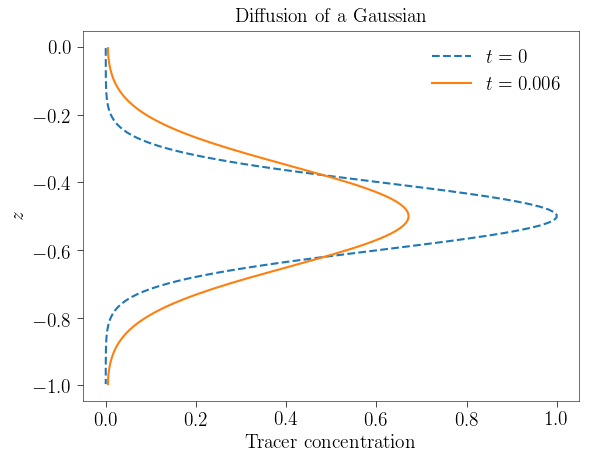

In [20]:
# A convenient function for generating a label with the Current model time
tracer_label(model) = @sprintf("\$ t=%.3f \$", model.clock.time)

# Create a figure with `PyPlot.jl`
fig, ax = subplots()
title("Diffusion of a Gaussian")
xlabel("Tracer concentration")
ylabel(L"z")

# Plot initial condition
plot(Tᵢ.(0, 0, model.grid.zC), model.grid.zC, "--", label=L"t=0")

# Plot current solution
plot(model.tracers.T[1, 1, :], model.grid.zC, label=tracer_label(model))
legend()
display()

Interesting! Running the model even longer makes even more interesting results.

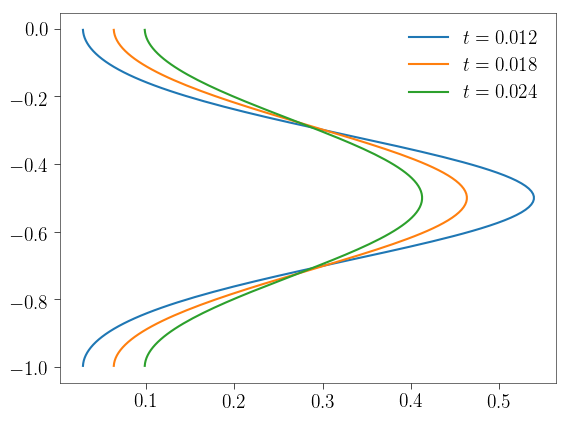

In [21]:
for i = 1:3
    time_step!(model, Nt = 1000, Δt = 0.1 * cell_diffusion_time_scale)
    plot(model.tracers.T[1, 1, :], model.grid.zC, label=tracer_label(model))
end

legend()
display()

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*